 1. design model,inputs and outputs size, and forward pass
 2. construct loss and optimizer
 3. training loop
   - forward pass
   - backward pass
   - update weights

In [1]:
import torch
import torch.nn as nn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# ------------------------
# 0. prepare data

bc = datasets.load_breast_cancer()   # 乳腺癌 二分类问题，根据输入的特征预测
# print(bc)
x, y = bc.data, bc.target
print(x.shape, y.shape)
print(x.dtype, y.dtype)
print(type(x), type(y))   # 可以看出属于numpy

# x.shape是元祖，以下两种都行，第二种更简便
# n_samlpes, n_features = x.shape[0], x.shape[1]
n_samlpes, n_features = x.shape
print(f'n_samples: {n_samlpes}, n_features: {n_features}')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

# scaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(type(x_train), type(x_test), type(y_train), type(y_test))

# 将numpy转为tensor
x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))
print(type(x_train), x_train.dtype)
print(type(y_train), y_train.dtype) 

# for i in zip(x_train, x_test, y_train, y_test):
#     print(f'"{i}": type({i}), {i}.dtype , {i}.shape, "\n')

# 将y数据转换为列向量
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)




# 1. model


# 2. loss and optimizer


# 3. training loop




(569, 30) (569,)
float64 int32
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
n_samples: 569, n_features: 30
(455, 30) (114, 30) (455,) (114,)
(455, 30) (114, 30) (455,) (114,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'torch.Tensor'> torch.float32
<class 'torch.Tensor'> torch.float32
torch.Size([455, 30]) torch.Size([114, 30]) torch.Size([455, 1]) torch.Size([114, 1])


0. prepare data
1. model
2. loss and optimizer
3. training loop

float64
torch.Size([100, 1]) torch.Size([100])
torch.Size([100, 1]) torch.Size([100, 1])
100
1
epoch: 100, w: 65.666, loss: 561.30670166
epoch: 200, w: 78.999, loss: 342.46496582
epoch: 300, w: 81.757, loss: 333.00442505
epoch: 400, w: 82.332, loss: 332.58700562
epoch: 500, w: 82.452, loss: 332.56845093
epoch: 600, w: 82.478, loss: 332.56756592
epoch: 700, w: 82.483, loss: 332.56753540
epoch: 800, w: 82.484, loss: 332.56756592
epoch: 900, w: 82.484, loss: 332.56756592
epoch: 1000, w: 82.484, loss: 332.56756592
weight: 82.484261
bias: 4.054055
x:  tensor([-0.6118, -0.2494,  0.4885,  0.7620,  1.5198,  0.3776,  0.5129, -0.6712,
        -1.3965,  0.3156, -0.6370, -0.3968, -1.1006,  0.9009, -1.0999,  0.8280,
        -0.0756, -0.3522, -0.6707, -1.0730, -0.3062,  2.1856,  0.8654,  0.1983,
        -0.3841, -0.6837,  0.0508,  0.5828,  1.2529, -0.7544, -0.3493, -0.8876,
         0.1866,  0.8762,  0.8390, -0.5045, -0.3439,  1.6925, -2.3015,  0.9311,
         2.1003,  1.4621, -0.8452, -0.8779, -0.

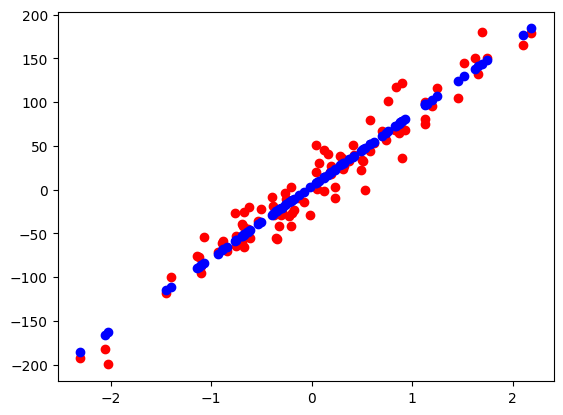

In [65]:
# 0. prepare data
# 用sklearn的函数生成回归模型的随机数据。
x_np,y_np = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
print(x_np.dtype)

x = torch.from_numpy(x_np.astype(np.float32))
y = torch.from_numpy(y_np.astype(np.float32))
print(x.shape, y.shape)
y = y.view(y.shape[0], 1)
print(x.shape, y.shape)

n_samples, n_features = x.shape
print(n_samples)
print(n_features)

# 1. model
input_size = n_features
output_size = 1

# 线性层输入的维度是1，因为数据是m*1,
model = nn.Linear(input_size, output_size)

# 2. loss and optimizer
lr = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# 3. training loop
epochs = 1000

# time_begin = time.time()
for i in range(epochs):
    #forward pass and loss
    y_hat = model(x)
    # print(y_hat.shape)
    loss = criterion(y_hat, y)
    
    # backward pass
    loss.backward()
    
    # update 
    optimizer.step()
    
    optimizer.zero_grad()
    
    if (i+1) % 100 == 0:
        print(f'epoch: {i+1}, w: {model.weight[0][0]:.3f}, loss: {loss.item():.8f}')
        
    if i+1 == 1000:
        print(f"weight: {model.weight[0][0]:.6f}")
        print(f"bias: {model.bias.item():.6f}")
        print("x: ", x[:, 0])
        print("-----------------------")
        print("y :", y_hat[:, 0])
    
# time_end = time.time()
# time = time_end - time_begin
# print(time)


predicted = y_hat.detach().numpy()
plt.plot(x_np, y_np, 'ro')
plt.plot(x_np, predicted, 'bo')
plt.show()
    
    





epoch: 10, loss = 4327.3643
epoch: 20, loss = 3232.0166
epoch: 30, loss = 2438.7588
epoch: 40, loss = 1863.7010
epoch: 50, loss = 1446.4379
epoch: 60, loss = 1143.4115
epoch: 70, loss = 923.1740
epoch: 80, loss = 762.9902
epoch: 90, loss = 646.4075
epoch: 100, loss = 561.5065


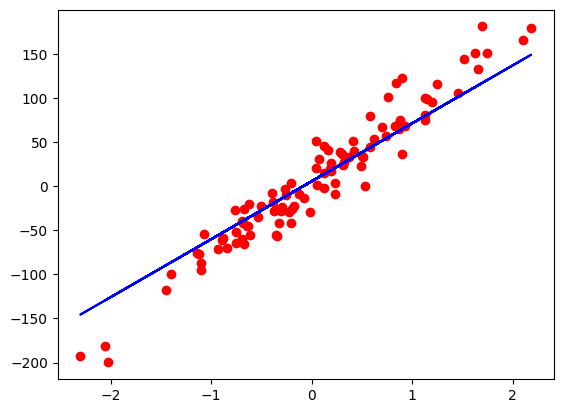

In [30]:
# github
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

# cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

# 1) Model
# Linear model f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) Loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# Plot
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()